In [422]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf 
from tensorflow import keras

In [423]:
df=pd.read_csv('/content/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [424]:
df.isna().any().sum()

0

In [425]:
df.shape

(7043, 21)

In [426]:
df.drop('customerID',axis='columns',inplace=True)

In [427]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [428]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [429]:
pd.to_numeric(df['TotalCharges'],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [430]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [431]:
df.iloc[6754].TotalCharges

' '

In [432]:
df1=df[df['TotalCharges']!=' ']
df1.shape

(7032, 20)

In [433]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])
df1.dtypes

<ipython-input-433-9ba3438e9bf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [434]:
df1[df1['Churn']=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


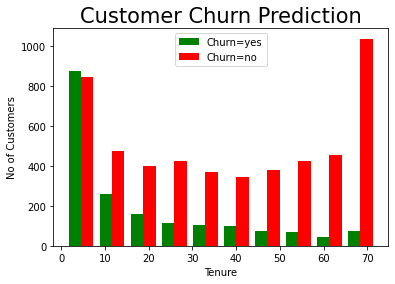

In [435]:
tenure_yes=df1[df1['Churn']=='Yes'].tenure
tenure_no=df1[df1['Churn']=='No'].tenure
plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction',fontsize=21)
plt.hist([tenure_yes,tenure_no],color=['green','red'],label=['Churn=yes','Churn=no'])
plt.legend(loc='upper center')

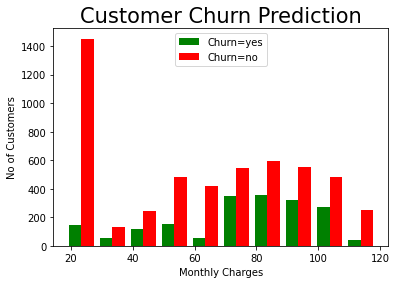

In [436]:
monthlycharges_churn_yes=df1[df1['Churn']=='Yes'].MonthlyCharges
monthlycharges_churn_no=df1[df1['Churn']=='No'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction',fontsize=21)
plt.hist([monthlycharges_churn_yes,monthlycharges_churn_no],color=['green','red'],label=['Churn=yes','Churn=no'])
plt.legend(loc='upper center')

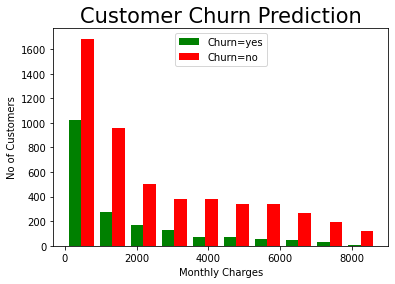

In [437]:
totalcharges_churn_yes=df1[df1['Churn']=='Yes'].TotalCharges
totalcharges_churn_no=df1[df1['Churn']=='No'].TotalCharges
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction',fontsize=21)
plt.hist([totalcharges_churn_yes,totalcharges_churn_no],color=['green','red'],label=['Churn=yes','Churn=no'])
plt.legend(loc='upper center')

In [438]:
for column in df1:
  if df1[column].dtypes == object:
    print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [439]:
df1.replace(['No internet service','No phone service'],'No',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [440]:
yes_no=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
        'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for columns in yes_no:
  df1[columns].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [441]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [442]:
df2=pd.get_dummies(df1,columns=['InternetService','Contract','PaymentMethod'])

In [443]:
for col in df2:
  print(f'{col}: {df2[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [444]:
scale=['MonthlyCharges','TotalCharges','tenure']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[scale]=scaler.fit_transform(df2[scale])

In [445]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [446]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [447]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [448]:
X_train.shape

(5625, 26)

In [449]:
X_test.shape

(1407, 26)

In [450]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(21,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [451]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [452]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4964 - accuracy: 0.7575
Epoch 2/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4289 - accuracy: 0.7945
Epoch 3/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4214 - accuracy: 0.7989
Epoch 4/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4178 - accuracy: 0.8028
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4149 - accuracy: 0.8044
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8037
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8055
Epoch 8/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8085
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8066
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8084

In [453]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8038


[0.4374144673347473, 0.8038379549980164]

In [454]:
ypredict=model.predict(X_test)
ypredict[:10]

44/44 [==============================] - 0s 3ms/step


array([[2.9151306e-01],
       [2.8041071e-01],
       [5.2609193e-01],
       [5.4581871e-04],
       [3.1852297e-02],
       [1.4590199e-01],
       [2.6650101e-04],
       [8.6972731e-01],
       [6.5846282e-01],
       [7.5869685e-01]], dtype=float32)

In [455]:
y_pred = []
for element in ypredict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [456]:
y_pred[30:40]

[0, 1, 1, 0, 0, 1, 1, 0, 0, 1]

In [457]:
y_test[30:40]

3602    0
122     1
2231    1
5366    0
2267    0
5391    0
178     0
3184    0
4739    0
1473    1
Name: Churn, dtype: int64

In [458]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1024
           1       0.68      0.53      0.60       383

    accuracy                           0.80      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



Text(69.0, 0.5, 'Truth')

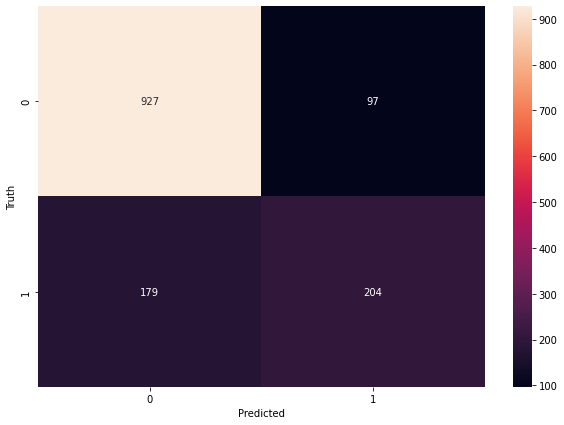

In [459]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')